##  Part III: Machine Learning - Baseline and Feature Engr. | Jupyter Notebook

## Final Project Submission

Please fill out:
* __Student name:__ Sharonda Pettiett-Warner
* __Student pace:__ part time - PT_0610
* __Scheduled project review date/time:__ April 24, 2020
* __Instructor name:__ Eli Thomas

## Problem Statement

> __Question:__ Can we accurately predict if a customer will cancel a hotel booking reservtions?
- __Goal:__
To build model to predict bookings cancellation likelihood.

# Begin Study
> In this notebook I will perform Machine Learning Analysis to __build the baseline model with feature engineering__.   This study will examine the hotel booking dataset from a kernel in Kaggle. The objective is to build a model to predict bookings cancellation likelihood.

In [1]:
import datetime
start = datetime.datetime.now()

### Import Libraries

In [2]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import auc, classification_report,  confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Imputer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

#### Import Functions

In [4]:
# ./module_ml.py file contains the following function(s): print_metrics(labels, preds) - used to Print Performance Metrics
import module_ml as m_ml   

### Load Dataset

In [5]:
dataset = pd.read_csv('./hotel_bookings.csv')
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
dataset.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
dataset.shape

(119390, 32)

# EDA

## Data Statistics

In [8]:
# Check column names for spaces
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
# Check for missing values
dataset.isna().any().any()

True

In [10]:
# Check for missing values
dataset.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# Check datatypes, # rows and columns, missing value
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [12]:
# To view statistical properties of numerical variables:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
# To view the statistical properties of character variables:
dataset.describe(include=['object'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [14]:
# Find numerical variables
numerical_vars = [var for var in dataset.columns if (dataset[var].dtype=='int64' or dataset[var].dtype=='float64')]
print(f'There are {len(numerical_vars)} numerical variables.\n')
print(f'The numerical variables are : {numerical_vars}\n')

There are 20 numerical variables.

The numerical variables are : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']



In [15]:
# Check for erroreous values in numerical data values
for var in numerical_vars:
    print(f'\n')
    print(dataset[var].value_counts(normalize = True))



0    0.629584
1    0.370416
Name: is_canceled, dtype: float64


0      0.053145
1      0.028981
2      0.017330
3      0.015211
4      0.014365
5      0.013108
6      0.012103
7      0.011148
8      0.009532
12     0.009038
11     0.008837
9      0.008309
10     0.008175
14     0.008083
16     0.007890
17     0.007379
19     0.007027
15     0.007027
34     0.006935
18     0.006919
13     0.006877
28     0.006868
20     0.006282
40     0.006047
29     0.005964
22     0.005922
32     0.005779
31     0.005737
21     0.005679
56     0.005662
         ...   
410    0.000084
361    0.000084
490    0.000075
354    0.000075
406    0.000050
471    0.000050
381    0.000042
390    0.000034
445    0.000025
460    0.000025
389    0.000025
376    0.000025
366    0.000025
382    0.000017
403    0.000017
399    0.000017
375    0.000017
362    0.000017
532    0.000008
400    0.000008
424    0.000008
709    0.000008
370    0.000008
463    0.000008
380    0.000008
458    0.000008
371    0.000008
737   

In [16]:
# Find categorical variables
categorical_vars = [var for var in dataset.columns if dataset[var].dtype=='O']
print(f'There are {len(categorical_vars)} categorical variables.\n')
print(f'The categorical variables are : {categorical_vars}\n')

There are 12 categorical variables.

The categorical variables are : ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']



In [17]:
# Check for erroreous values in categorical data values
for var in categorical_vars: 
    print(f'\n')
    print(dataset[var].value_counts(normalize = True))



City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64


August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64


BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64


PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
ITA    0.031673
IRL    0.028385
BEL    0.019697
BRA    0.018704
NLD    0.017695
USA    0.017636
CHE    0.014550
CN     0.010757
AUT    0.010622
SWE    0.008612
CHN    0.008402
POL    0.007729
ISR    0.005626
RUS    0.005315
NOR    0.005105
ROU    0.004205
FIN    0.003759
DNK    0.003658
AUS    0.003583
AGO    0.003045
LUX    0.002414
MAR    0.002178
TUR    0.002086
HUN    0.001934
ARG    0

#### Observations: EDA 
- reservation_status_date dtype = object, will need to change to datetime.
- Missing rows in the dataset for the following: company, agent and country
- Many object data type columns, could be represented by categorical columns
- Dataset contains 12 character variables and 20 numerical variables.
- TARGET: is_canceled is the target variable.

## Visualization

> __NOTE:__ All Visualization is created in the Capstone_EDA.ipynb

#### Target Variable

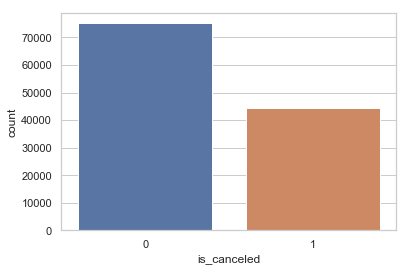

In [18]:
# Evaluate Target Values
sns.countplot(dataset['is_canceled']);

In [19]:
dataset['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

> Dataset contains a distribution of __37 %__ entries labeled as booking cancellations and __76%__ entries labeled as successful bookings.

#### Evaluate data correlations

In [20]:
dataset.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

## Pandas Profiling

#### Observations: Pandas Profiling 
- (Review Report Output from EDA Analysis)
- output_file='./Booking Cancellation Profile - ML.html'

# Data Cleaning

In [21]:
# Copy raw dataset to new dataframe for furter processing
df = dataset.copy()

In [22]:
df.shape

(119390, 32)

#### Change Data type

In [23]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

#### Drop columns

In [24]:
# Drop column(s) due to alot of missing entries (or pre-preprocessing column(s))
df = df.drop(['company', 'booking_changes', 'reservation_status'], axis=1) # 'days_in_waiting_list'], axis=1)


> Dropped the following columns:
- company: 112593 contained (0's) out of 119389 (94% missing values).
- booking changes and reservation_status created data leakage (leakage predictors).  The number of booking changes is a possible source of leakage, because this information can change over time. Heuristic created by summing the number of booking changes (amendments) prior to arrival that can indicate cancellation intentions.
- Decision: Do __not__ drop - days_in_waiting_list = Number of days the booking was on a waiting list prior to confirming the availability and being confirmed as a booking;  This column may need more evaluation to determine if it is creating data leakage.

#### Drop rows

In [25]:
# Drop rows with missing values
df = df.dropna().reset_index(drop=True)

#### Impute the missing values in the dataset

In [26]:
#df.fillna({'children' : 0, 'country' : 'Unknown', 'agent' : 0, 'company' : 0}, inplace = True)

- Decision: Do __not__ impute the columns with missing values in the dataset, instead decided to dropna.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102894 entries, 0 to 102893
Data columns (total 29 columns):
hotel                             102894 non-null object
is_canceled                       102894 non-null int64
lead_time                         102894 non-null int64
arrival_date_year                 102894 non-null int64
arrival_date_month                102894 non-null object
arrival_date_week_number          102894 non-null int64
arrival_date_day_of_month         102894 non-null int64
stays_in_weekend_nights           102894 non-null int64
stays_in_week_nights              102894 non-null int64
adults                            102894 non-null int64
children                          102894 non-null float64
babies                            102894 non-null int64
meal                              102894 non-null object
country                           102894 non-null object
market_segment                    102894 non-null object
distribution_channel              102894 n

In [28]:
# Check for null values in the data
df.isnull().any().any()

False

#### Remove Duplicate Rows 

In [29]:
# Remove duplicate rows from the dataset ? 
# df = df.drop_duplicates().reset_index(drop=True)
# df.shape

#### Export Clean Dataframe to .csv File

In [30]:
df.to_csv(r'./hotel_booking_clean.csv', index = False)

#### Observations: Data Cleaning 
- Decision:  Do __not__ remove duplicate rows from the dataset? Dataset has approx. 31K duplicate rows: (26%)
- Deleted columns and rows with missing values (13.8%)
- Decision: Do __not__ impute the columns with missing values in the dataset, instead decided to dropna.

# Feature Engineering

#### One-hot Encoding

In [31]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,304.0,0,75.0,0,0,2015-07-02,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,240.0,0,98.

In [32]:
df.shape

(102894, 238)

In [33]:
list(df.columns)

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'hotel_Resort Hotel',
 'arrival_date_month_August',
 'arrival_date_month_December',
 'arrival_date_month_February',
 'arrival_date_month_January',
 'arrival_date_month_July',
 'arrival_date_month_June',
 'arrival_date_month_March',
 'arrival_date_month_May',
 'arrival_date_month_November',
 'arrival_date_month_October',
 'arrival_date_month_September',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'country_AGO',
 'country_AIA',
 'country_ALB',
 'country_AND',
 'country_ARE',
 'country_ARG',
 'country_ARM',
 'country_ASM',
 'country_ATA',
 'country_ATF',
 'country_AUS

#### Observations: Feature Engineering 
- Implemented one-hot-encoding (ohe) on 11 categorical columns in the dataset.

#### Evaluate correlation with vaiables

In [34]:
df.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                      1.000000
deposit_type_Non Refund          0.461937
country_PRT                      0.374549
lead_time                        0.277666
total_of_special_requests        0.257934
market_segment_Groups            0.218866
required_car_parking_spaces      0.188298
customer_type_Transient          0.141870
country_FRA                      0.131060
customer_type_Transient-Party    0.129008
assigned_room_type_D             0.125338
country_GBR                      0.122868
country_DEU                      0.120235
previous_cancellations           0.117983
hotel_Resort Hotel               0.116237
market_segment_Direct            0.113175
distribution_channel_Direct      0.108642
distribution_channel_TA/TO       0.105387
agent                            0.081939
country_ESP                      0.067190
assigned_room_type_E             0.060163
market_segment_Offline TA/TO     0.058531
country_NLD                      0.055488
reserved_room_type_D             0

# Create Train, Test Splits

#### Create X,y variables

In [35]:
# Create X, y vars for further processing
y = df['is_canceled']
X = df.drop(['is_canceled', 'reservation_status_date'], axis=1)

In [36]:
X.tail()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
102889,23,2017,35,30,2,5,2,0.0,0,0,0,0,394.0,0,96.14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
102890,102,2017,35,31,2,5,3,0.0,0,0,0,0,9.0,0,225.43,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [37]:
y.tail()

102889    0
102890    0
102891    0
102892    0
102893    0
Name: is_canceled, dtype: int64

#### Create train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [39]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(72025, 236) (72025,) (30869, 236) (30869,)


# Create Baseline Model(s)

### Iterate through Classification Models

In [40]:
# Spot Check Algorithms

models = []
models.append(('GaussianNB', GaussianNB()))
models.append(('LogRegress', LogisticRegression()))
models.append(('LinearDiscr', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClf', KNeighborsClassifier()))
models.append(('DecisionTreeClf', DecisionTreeClassifier()))
models.append(('RandomForestClf', RandomForestClassifier()))
models.append(('AdaBoostClf', AdaBoostClassifier()))
models.append(('GradBoostClf', GradientBoostingClassifier()))
models.append(('XGBClassifier', XGBClassifier()))

# Evaluate each model 
results = []
names   = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1) # TRY? fold=KFold(n_splits=10,random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') # Fit data
    results.append(cv_results)
    names.append(name)
    print(f'{name}\t Train Accuracy Score (mean): {round(cv_results.mean(),6)} (std): +/- {round(cv_results.std(),6)}')

GaussianNB	 Train Accuracy Score (mean): 0.530191 (std): +/- 0.007457
LogRegress	 Train Accuracy Score (mean): 0.803721 (std): +/- 0.004019
LinearDiscr	 Train Accuracy Score (mean): 0.795252 (std): +/- 0.003434
KNeighborsClf	 Train Accuracy Score (mean): 0.756834 (std): +/- 0.004184
DecisionTreeClf	 Train Accuracy Score (mean): 0.84765 (std): +/- 0.00254
RandomForestClf	 Train Accuracy Score (mean): 0.867934 (std): +/- 0.003555
AdaBoostClf	 Train Accuracy Score (mean): 0.817327 (std): +/- 0.004324
GradBoostClf	 Train Accuracy Score (mean): 0.84075 (std): +/- 0.003609
XGBClassifier	 Train Accuracy Score (mean): 0.836154 (std): +/- 0.005124


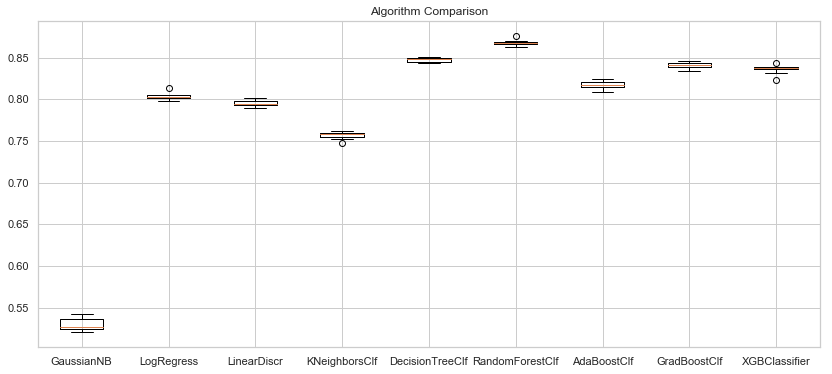

In [41]:
# Compare Algorithms
plt.figure(figsize=(14,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

#### Observations: Baseline Models
- The best performing models:
    
    - __LogRegress__	
    - __DecisionTreeClf__
    - __RandomForestClf__	  
    - __AdaBoostClf__	     
    - __GradBoostClf__	    
    - __XGBClassifier__	  

# Build Predictive Models for Selected Classifiers

- Selected classifiers to continue further analyis:

    - __LogRegress__	
    - __DecisionTreeClf__
    - __RandomForestClf__	  
    - __AdaBoostClf__	     
    - __GradBoostClf__	    
    - __XGBClassifier__	       

## Analysis Model - 1 | Perform Scaling

> Update feature engineering to perform __scaling__ of the data in an effort to improve the model performance.

### StandardScaler()

In [42]:
# StandardScaler()
from sklearn.preprocessing import StandardScaler

pipe_logRegr = Pipeline([('scaler', StandardScaler()),
        ('clf', LogisticRegression())])

pipe_dt = Pipeline([('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier())])

pipe_rf = Pipeline([('scaler', StandardScaler()),
        ('clf', RandomForestClassifier())])

pipe_ab = Pipeline([('scaler', StandardScaler()),
        ('clf', AdaBoostClassifier())])

pipe_gb = Pipeline([('scaler', StandardScaler()),
        ('clf', GradientBoostingClassifier())])

pipe_xgb = Pipeline([('scaler', StandardScaler()),
        ('clf', XGBClassifier())])

# List of pipelines, List of pipeline names
pipelines = [pipe_logRegr, pipe_dt, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LogRegress', 'DecisionTreeClf', 'RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]

# Loop to fit each of the pipelines in the named list
for pipe in pipelines:
    #print(pipe)
    pipe.fit(X_train, y_train)

# Compare Test and Train Accuracy Scores
for index, val in enumerate(pipelines):
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(val.score(X_test, y_test),6)} \t Train Accuracy Score: {round(val.score(X_train, y_train),6)}')

LogRegress	 Test Accuracy Score: 0.807639 	 Train Accuracy Score: 0.80722
DecisionTreeClf	 Test Accuracy Score: 0.852052 	 Train Accuracy Score: 0.996126
RandomForestClf	 Test Accuracy Score: 0.872105 	 Train Accuracy Score: 0.988865
AdaBoostClf	 Test Accuracy Score: 0.812757 	 Train Accuracy Score: 0.816494
GradBoostClf	 Test Accuracy Score: 0.841394 	 Train Accuracy Score: 0.843166
XGBClassifier	 Test Accuracy Score: 0.836146 	 Train Accuracy Score: 0.83857


### MinMaxScaler()

In [43]:
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

pipe_logRegr = Pipeline([('mms', MinMaxScaler()),
        ('clf', LogisticRegression())])

pipe_dt = Pipeline([('mms', MinMaxScaler()),
        ('clf', DecisionTreeClassifier())])

pipe_rf = Pipeline([('mms', MinMaxScaler()),
        ('clf', RandomForestClassifier())])

pipe_ab = Pipeline([('mms', MinMaxScaler()),
        ('clf', AdaBoostClassifier())])

pipe_gb = Pipeline([('mms', MinMaxScaler()),
        ('clf', GradientBoostingClassifier())])

pipe_xgb = Pipeline([('mms', MinMaxScaler()),
        ('clf', XGBClassifier())])

# List of pipelines, List of pipeline names
pipelines = [pipe_logRegr, pipe_dt, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LogRegress', 'DecisionTreeClf', 'RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]
# Loop to fit each of the pipelines in the named list
for pipe in pipelines:
    #print(pipe)
    pipe.fit(X_train, y_train)

# Compare Test and Train Accuracy Scores
for index, val in enumerate(pipelines):
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(val.score(X_test, y_test),6)} \t Train Accuracy Score: {round(val.score(X_train, y_train),6)}')

LogRegress	 Test Accuracy Score: 0.800674 	 Train Accuracy Score: 0.801666
DecisionTreeClf	 Test Accuracy Score: 0.850789 	 Train Accuracy Score: 0.996126
RandomForestClf	 Test Accuracy Score: 0.871522 	 Train Accuracy Score: 0.989226
AdaBoostClf	 Test Accuracy Score: 0.812757 	 Train Accuracy Score: 0.816494
GradBoostClf	 Test Accuracy Score: 0.841394 	 Train Accuracy Score: 0.843166
XGBClassifier	 Test Accuracy Score: 0.836146 	 Train Accuracy Score: 0.83857


### RobustScaler()

In [44]:
# RobustScaler()
from sklearn.preprocessing import RobustScaler

pipe_logRegr = Pipeline([('rs', RobustScaler()),
        ('clf', LogisticRegression())])

pipe_dt = Pipeline([('rs', RobustScaler()),
        ('clf', DecisionTreeClassifier())])

pipe_rf = Pipeline([('rs', RobustScaler()),
        ('clf', RandomForestClassifier())])

pipe_ab = Pipeline([('rs', RobustScaler()),
        ('clf', AdaBoostClassifier())])

pipe_gb = Pipeline([('rs', RobustScaler()),
        ('clf', GradientBoostingClassifier())])

pipe_xgb = Pipeline([('rs', RobustScaler()),
        ('clf', XGBClassifier())])

# List of pipelines, List of pipeline names
pipelines = [pipe_logRegr, pipe_dt, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LogRegress', 'DecisionTreeClf', 'RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]

# Loop to fit each of the pipelines in the named list
for pipe in pipelines:
    #print(pipe)
    pipe.fit(X_train, y_train)

# Compare Test and Train Accuracy Scores
for index, val in enumerate(pipelines):
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(val.score(X_test, y_test),6)} \t Train Accuracy Score: {round(val.score(X_train, y_train),6)}')

LogRegress	 Test Accuracy Score: 0.80738 	 Train Accuracy Score: 0.806956
DecisionTreeClf	 Test Accuracy Score: 0.849072 	 Train Accuracy Score: 0.996126
RandomForestClf	 Test Accuracy Score: 0.873562 	 Train Accuracy Score: 0.989143
AdaBoostClf	 Test Accuracy Score: 0.812757 	 Train Accuracy Score: 0.816494
GradBoostClf	 Test Accuracy Score: 0.841394 	 Train Accuracy Score: 0.843166
XGBClassifier	 Test Accuracy Score: 0.836146 	 Train Accuracy Score: 0.83857


#### Observations: Model - 1 | Perform Scaling 
- All models had a performance improvement from the baseline accuracy scores with all scaling algorithms.
- The best performing scaling algorithm is __RobustScaler()__. 
- The best performing model without overfitting is __GradBoostClf__:
    - __Test Accuracy Score: 0.841394 	 Train Accuracy Score: 0.843166__
- Overfitting with the following model(s): 
    - __RandomForestClf:__	 
    __Test Accuracy Score: 0.870453 	 Train Accuracy Score: 0.988823__
    - __DecisionTreeClf:__    
    __Test Accuracy Score: 0.850432 	 Train Accuracy Score: 0.996126__
        - Consider: Pruning by tuning the classifier hyperparameters.

## Analysis Model - 2 | Parameter Tuning  Model(s)

> Use __Pipeline__ and  __GridSearchCV__ to prune/tune classification model(s) in an effort to improve the model performance.

#### RandomForestClf()

In [45]:
from sklearn.pipeline import Pipeline

# Random Forest

pipe_rf = Pipeline([('rs', RobustScaler()),
        ('clf', RandomForestClassifier(random_state = 42))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [10, 100, 120, 1000],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6, 7, 8, 20] 
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=5, verbose=0, return_train_score = True) # verbose=2

# Fit using grid search
model = gs_rf.fit(X_train, y_train)
target_names = y_test.unique().astype(str)
y_pred = model.predict(X_test)

print(f'Classification Report:\n {classification_report(y_test, y_pred, target_names=target_names)}\n')
# Best params
print(f'Model Parameters:\n {gs_rf.best_params_}\n')
# Best est and Train Accuracy
print(f'Model Accuracy Scores:')
print(f'RandomForestClf \t Test Accuracy Score: {round(model.score(X_test, y_test),6)} \t Train Accuracy Score: {round(model.score(X_train, y_train),6)}')

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     18761
           1       0.89      0.75      0.81     12108

   micro avg       0.86      0.86      0.86     30869
   macro avg       0.87      0.84      0.85     30869
weighted avg       0.87      0.86      0.86     30869


Model Parameters:
 {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__n_estimators': 1000}

Model Accuracy Scores:
RandomForestClf 	 Test Accuracy Score: 0.864881 	 Train Accuracy Score: 0.895467


In [46]:
# ''' Classification Report:
#                precision    recall  f1-score   support

#            0       0.85      0.94      0.89     18761
#            1       0.89      0.75      0.81     12108

#    micro avg       0.86      0.86      0.86     30869
#    macro avg       0.87      0.84      0.85     30869
# weighted avg       0.87      0.86      0.86     30869


# Model Parameters:
#  {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__n_estimators': 1000}

# Model Accuracy Scores:
# RandomForestClf 	 Test Accuracy Score: 0.864881 	 Train Accuracy Score: 0.895467'''

#### Gradient Boost Classifier()

In [47]:
from sklearn.pipeline import Pipeline

# Gradient Boost

pipe_gb = Pipeline([('rs', RobustScaler()),
        ('clf', GradientBoostingClassifier(random_state = 42))])

# Set grid search params
param_grid_gb = [ 
  {'clf__n_estimators': [100, 500, 1000],
   'clf__learning_rate': [.01,.001], 
   'clf__max_depth': [3,6] 
  }
]

# Construct grid search
gs_gb = GridSearchCV(estimator=pipe_gb,
            param_grid=param_grid_gb,
            scoring='accuracy',
            cv=5, verbose=0, return_train_score = True) # verbose=2

# Fit using grid search
model = gs_gb.fit(X_train, y_train)
target_names = y_test.unique().astype(str)
y_pred = model.predict(X_test)

print(f'Classification Report:\n {classification_report(y_test, y_pred, target_names=target_names)}\n')
# Best params
print(f'Model Parameters:\n {gs_gb.best_params_}\n')
# Best est and Train Accuracy
print(f'Model Accuracy Scores:')
print(f'GradientBoostingClassifier\t Test Accuracy Score: {round(model.score(X_test, y_test),6)} \t Train Accuracy Score: {round(model.score(X_train, y_train),6)}')

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     18761
           1       0.84      0.79      0.81     12108

   micro avg       0.86      0.86      0.86     30869
   macro avg       0.86      0.85      0.85     30869
weighted avg       0.86      0.86      0.86     30869


Model Parameters:
 {'clf__learning_rate': 0.01, 'clf__max_depth': 6, 'clf__n_estimators': 1000}

Model Accuracy Scores:
GradientBoostingClassifier	 Test Accuracy Score: 0.859665 	 Train Accuracy Score: 0.867296


In [48]:
# ''' Classification Report:
#                precision    recall  f1-score   support

#            0       0.87      0.91      0.89     18761
#            1       0.84      0.79      0.81     12108

#    micro avg       0.86      0.86      0.86     30869
#    macro avg       0.86      0.85      0.85     30869
# weighted avg       0.86      0.86      0.86     30869


# Model Parameters:
#  {'clf__learning_rate': 0.01, 'clf__max_depth': 6, 'clf__n_estimators': 1000}

# Model Accuracy Scores:
# GradientBoostingClassifier	 Test Accuracy Score: 0.859665 	 Train Accuracy Score: 0.867296'''

#### Observations: Model -2 | Tune Classification Model(s)
- Parameter tuning improved performance significantly for both RandomForest and GradientBoost Alogorithms.
- Improved RandomForest Model Test Accuracy to __0.864881__ without overfitting.
- Improved GradientBoost Model Test Accuracy to __0.859665__ from __0.841394__.
- Removed the issue of overfitting by pruning the model:
    - Pruning by tuning the classifier hyperparameters: 
        -  RandomForestClf: {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__n_estimators': 1000}
         __Test Accuracy Score: 0.864881 | Train Accuracy Score: 0.895467__
        
        -  GradientBoosting: {'clf__learning_rate': 0.01, 'clf__max_depth': 6, 'clf__n_estimators': 1000}
        __Test Accuracy Score: 0.859665 | Train Accuracy Score: 0.867296__

## Analysis Model -3 | Identify Most Predictive Features

### Using RFECV

In [49]:
from sklearn.feature_selection import RFECV
estimator = RandomForestClassifier(random_state=42)
selector = RFECV(estimator, step=1, cv=10, scoring = 'accuracy')
selector = selector.fit(X_train, y_train)
display(selector.support_) # List of boolean values
display(selector.ranking_)

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

array([  1,   1,   1,   1,   1,   1,   1,   1,  18,  19,   1,   3,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,  17,   1,   1,  29,  12, 161, 106, 125,  39,  38,
       113, 177, 150, 122,  25,  10,  98, 181,   1, 123, 158,  95,  60,
       108, 179, 114,  85, 157,   1, 164, 160, 168,   1,  70,   7, 105,
       119,   8,  48, 130,  90, 104, 109, 155,  76,  36,   1, 146, 153,
        26, 110,  61,  69,  86,   1,  63, 129,  31, 144,   1, 132, 102,
         1,  74, 162, 131,  78, 127, 141,  53, 136, 184,  43, 128,  54,
        34,  52, 124,  46,   1,  42, 135,  89,  21,   1, 167,  96,  97,
        41,  99, 115, 148, 163, 169,  35,  71, 178,  82, 170, 156, 107,
       137,  64,  22,  72,  92,  24, 112,  88,  66, 134, 176,  80, 183,
       151,  68, 182, 117, 175,  87, 116, 101, 139,  47, 159,   1,  20,
       154,  57, 145, 100,  91,  84,  45, 171,  16, 143,   1, 149, 180,
        81,  23,  15, 172,  59, 166, 103,  58, 133, 138,  75, 12

In [50]:
# List of X Train Columns
X_train.columns
X_train.shape

(72025, 236)

#### Most Predictive Features

In [51]:
# Most Predictive Features
rfecv_mask = selector.get_support()  # List of boolean values
best_features = []

for each_bool, feat in zip(rfecv_mask, X_train.columns):
    if each_bool == True:
        best_features.append(feat)
print(f'Optimal number of predictive features: {selector.n_features_}')
print(f'Number of most predictive features: {len(best_features)}')
print(f'Most Predictive Features: \n {best_features}')

Optimal number of predictive features: 53
Number of most predictive features: 53
Most Predictive Features: 
 ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'previous_cancellations', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'hotel_Resort Hotel', 'arrival_date_month_August', 'arrival_date_month_December', 'arrival_date_month_February', 'arrival_date_month_January', 'arrival_date_month_July', 'arrival_date_month_June', 'arrival_date_month_March', 'arrival_date_month_May', 'arrival_date_month_November', 'arrival_date_month_October', 'arrival_date_month_September', 'meal_HB', 'meal_SC', 'country_BEL', 'country_BRA', 'country_CHE', 'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR', 'country_IRL', 'country_ITA', 'country_NLD', 'country_PRT', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segm

Optimal number of features : 57


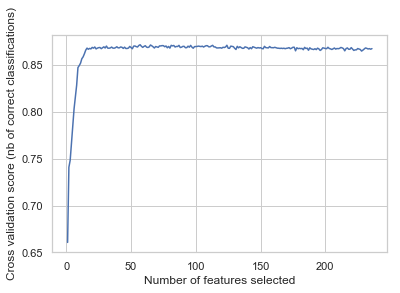

In [52]:
# Diagram of Optimal number of features_
rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Least Predictive Features

In [53]:
# Least Predictive Features:
rfecv_mask = selector.get_support()  # List of boolean values
worst_features = []

for each_bool, feat in zip(rfecv_mask, X_train.columns):
    if each_bool == False:
        worst_features.append(feat)

print(f'Number of least predictive features: {len(worst_features)}')
print(f'Least Predictive Features: \n {worst_features}')

least_import_feat = worst_features #least_import_feat

Number of least predictive features: 183
Least Predictive Features: 
 ['babies', 'is_repeated_guest', 'previous_bookings_not_canceled', 'meal_FB', 'meal_Undefined', 'country_AGO', 'country_AIA', 'country_ALB', 'country_AND', 'country_ARE', 'country_ARG', 'country_ARM', 'country_ASM', 'country_ATA', 'country_ATF', 'country_AUS', 'country_AUT', 'country_AZE', 'country_BDI', 'country_BEN', 'country_BFA', 'country_BGD', 'country_BGR', 'country_BHR', 'country_BHS', 'country_BIH', 'country_BLR', 'country_BOL', 'country_BRB', 'country_BWA', 'country_CAF', 'country_CHL', 'country_CHN', 'country_CIV', 'country_CMR', 'country_CN', 'country_COL', 'country_COM', 'country_CPV', 'country_CRI', 'country_CUB', 'country_CYM', 'country_CYP', 'country_CZE', 'country_DJI', 'country_DMA', 'country_DNK', 'country_DOM', 'country_DZA', 'country_ECU', 'country_EGY', 'country_EST', 'country_ETH', 'country_FIN', 'country_FJI', 'country_FRO', 'country_GAB', 'country_GEO', 'country_GGY', 'country_GHA', 'country_GI

In [54]:
# Drop the least important feature(s) from X_train and X_test
X_train = X_train.drop(least_import_feat, axis=1)
X_test = X_test.drop(least_import_feat, axis=1)

In [55]:
print(X_train.shape, X_test.shape )

(72025, 53) (30869, 53)


### Re-run Algorithm(s) - Determine Best Performing Model

In [56]:
import importlib
importlib.reload(m_ml)

<module 'module_ml' from 'C:\\Data_Science\\FlatIron_DS_Bootcamp\\Projects\\Capstone\\Final\\module_ml.py'>

LogRegress	 Test Accuracy Score: 0.795588 	 Train Accuracy Score: 0.796362

Null Accuracy:
0    0.607762
Name: is_canceled, dtype: float64

cohen_kappa_score: 
 0.5569076055833857 

matthews_corrcoef: 
 0.5637498745165267 

roc_auc_score: 
 0.7694339924035668 

The classifier made a total of 30869 predictions.

The classifier predicted guests booked the hotel 20973 times, and canceled 9896 times.
Actually, 18761 guests booked the hotel and 12108 guests canceled.
_________ 

Confusion Matrix Metrics: TP = 7847 | TN = 16712 | FP = 2049 | FN = 4261 


[[16712  2049]
 [ 4261  7847]]

Number of Type I Errors: 2049
Number of Type II Errors: 4261


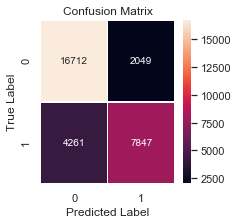

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.80      0.89      0.84     18761
    is_canceled (1)       0.79      0.65      0.71     12108

          micro avg       0.80      0.80      0.80     30869
          macro avg       0.79      0.77      0.78     30869
       weighted avg       0.80      0.80      0.79     30869


Precision Score: 0.792946645109135
Specificity: 0.8907840733436384
Recall Score: 0.6480839114634952
Accuracy Score: 0.7955878065373028
F1 Score: 0.7132339574622796
Misclassification Rate: 0.20441219346269723
_________ 

Among 30869 observations our model is predicting 9896 canceled. 
In actual,  12108 have canceled and among those, the model identified 7847 correctly.

True  Positive: 7847.  The model has predicted the positive (1) case, correctly.
True  Negative: 16712.  The model has predicted the negative case (0), correctly.
False Positive: 2049.  The model has predicted these customers would ca

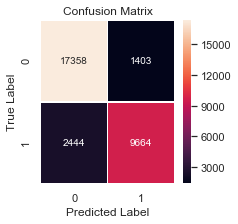

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.88      0.93      0.90     18761
    is_canceled (1)       0.87      0.80      0.83     12108

          micro avg       0.88      0.88      0.88     30869
          macro avg       0.87      0.86      0.87     30869
       weighted avg       0.88      0.88      0.87     30869


Precision Score: 0.8732267100388542
Specificity: 0.9252172059058685
Recall Score: 0.7981499834819954
Accuracy Score: 0.8753765914023778
F1 Score: 0.8340021574973031
Misclassification Rate: 0.12462340859762222
_________ 

Among 30869 observations our model is predicting 11067 canceled. 
In actual,  12108 have canceled and among those, the model identified 9664 correctly.

True  Positive: 9664.  The model has predicted the positive (1) case, correctly.
True  Negative: 17358.  The model has predicted the negative case (0), correctly.
False Positive: 1403.  The model has predicted these customers would 

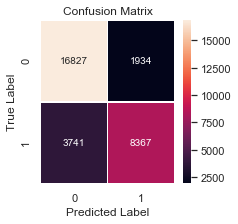

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.82      0.90      0.86     18761
    is_canceled (1)       0.81      0.69      0.75     12108

          micro avg       0.82      0.82      0.82     30869
          macro avg       0.82      0.79      0.80     30869
       weighted avg       0.82      0.82      0.81     30869


Precision Score: 0.8122512377439084
Specificity: 0.8969138105644688
Recall Score: 0.6910307234886026
Accuracy Score: 0.8161586057209498
F1 Score: 0.7467535365255032
Misclassification Rate: 0.18384139427905022
_________ 

Among 30869 observations our model is predicting 10301 canceled. 
In actual,  12108 have canceled and among those, the model identified 8367 correctly.

True  Positive: 8367.  The model has predicted the positive (1) case, correctly.
True  Negative: 16827.  The model has predicted the negative case (0), correctly.
False Positive: 1934.  The model has predicted these customers would 

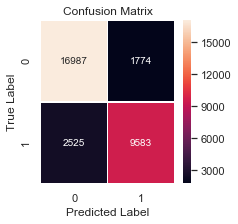

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.87      0.91      0.89     18761
    is_canceled (1)       0.84      0.79      0.82     12108

          micro avg       0.86      0.86      0.86     30869
          macro avg       0.86      0.85      0.85     30869
       weighted avg       0.86      0.86      0.86     30869


Precision Score: 0.8437967773179537
Specificity: 0.9054421406108416
Recall Score: 0.7914601916088536
Accuracy Score: 0.8607340697787424
F1 Score: 0.8167909652674196
Misclassification Rate: 0.13926593022125755
_________ 

Among 30869 observations our model is predicting 11357 canceled. 
In actual,  12108 have canceled and among those, the model identified 9583 correctly.

True  Positive: 9583.  The model has predicted the positive (1) case, correctly.
True  Negative: 16987.  The model has predicted the negative case (0), correctly.
False Positive: 1774.  The model has predicted these customers would 

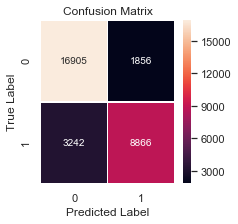

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.84      0.90      0.87     18761
    is_canceled (1)       0.83      0.73      0.78     12108

          micro avg       0.83      0.83      0.83     30869
          macro avg       0.83      0.82      0.82     30869
       weighted avg       0.83      0.83      0.83     30869


Precision Score: 0.8268979667972394
Specificity: 0.9010713714620756
Recall Score: 0.7322431450280806
Accuracy Score: 0.834850497262626
F1 Score: 0.7766973280770916
Misclassification Rate: 0.16514950273737405
_________ 

Among 30869 observations our model is predicting 10722 canceled. 
In actual,  12108 have canceled and among those, the model identified 8866 correctly.

True  Positive: 8866.  The model has predicted the positive (1) case, correctly.
True  Negative: 16905.  The model has predicted the negative case (0), correctly.
False Positive: 1856.  The model has predicted these customers would c

In [57]:
# Re-run models to determine the best performing model

pipe_logRegr = Pipeline([('rs', RobustScaler()),
        ('clf', LogisticRegression())])

pipe_rf = Pipeline([('rs', RobustScaler()),
        #('clf', RandomForestClassifier(random_state = 42))])
         ('clf', RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=1000, n_jobs=-1, random_state = 42))])

pipe_ab = Pipeline([('rs', RobustScaler()),
        ('clf', AdaBoostClassifier(random_state = 42))])

pipe_gb = Pipeline([('rs', RobustScaler()),
        #('clf', GradientBoostingClassifier(random_state = 42))])
        ('clf', GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=1000, random_state = 42))])

pipe_xgb = Pipeline([('rs', RobustScaler()),
        ('clf', XGBClassifier(random_state = 42))])

# List of pipelines, List of pipeline names
pipelines = [pipe_logRegr, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LogRegress', 'RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]
scoring_results = []

# Loop to fit each of the pipelines in the named list
for index, pipe in enumerate(pipelines):
    #print(pipe)
    pipe.fit(X_train, y_train)
    
    # Fit using grid search
    model = pipe.fit(X_train, y_train)
    target_names = ['is_not_canceled (0)', 'is_canceled (1)'] #y_test.unique().astype(str)
    y_pred = model.predict(X_test)
    
    # Compare Test and Train Accuracy Scores
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(pipe.score(X_test, y_test),6)} \t Train Accuracy Score: {round(pipe.score(X_train, y_train),6)}\n')
    scoring_results.append(round(pipe.score(X_test, y_test),6))
    
    # Null Accuracy
    y_test.value_counts()/len(y_test)
    print(f'Null Accuracy:\n{y_test.value_counts().head(1)/len(y_test)}\n')
    
    # cohen_kappa_score
    print(f'cohen_kappa_score: \n {cohen_kappa_score(y_test, y_pred)} \n')
    
    # matthews_corrcoef
    print(f'matthews_corrcoef: \n {matthews_corrcoef(y_test, y_pred)} \n')
    
    # roc_auc_score
    print(f'roc_auc_score: \n {roc_auc_score(y_test, y_pred)} \n')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    TP = cm[1,1]  # True Positives
    TN = cm[0,0]  # True Negatives
    FP = cm[0,1]  # False Positves - Type I Errors
    FN = cm[1,0]  # False Negatives - Type II Errors
    num_pred = len(y_pred)
    
    print(f'The classifier made a total of {len(y_pred)} predictions.\n')
    print(f'The classifier predicted guests booked the hotel {TN+FN} times, and canceled {TP+FP} times.')
    print(f'Actually, {TN+FP} guests booked the hotel and {TP+FN} guests canceled.')
    print(f'_________ \n')
    print(f'Confusion Matrix Metrics: TP = {TP} | TN = {TN} | FP = {FP} | FN = {FN} \n')
    print(f'\n{cm}\n')  # Print confusion matrix
    print(f'Number of Type I Errors: {FP}')
    print(f'Number of Type II Errors: {FN}')
    
    f, ax = plt.subplots(figsize =(3,3))
    sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="white",fmt = ".0f",ax=ax)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    print(f'Classification Report:\n {classification_report(y_test, y_pred, target_names=target_names)}\n')
    m_ml.print_metrics(y_test, y_pred, TN, TP, FN, FP, num_pred)
    print(f'################################################################################# \n')

final_scoring_results = list(zip(pipeline_names, scoring_results))
final_scoring_results = pd.DataFrame(final_scoring_results, columns=['Classifier','Acc Score (test)'])

#### Observations: Determine Best Performing Model


In [58]:
final_scoring_results = pd.DataFrame(final_scoring_results)
final_scoring_results.columns = ['Classifier','Acc Score (test)']
final_scoring_results

,Classifier,Acc Score (test)
0,LogRegress,0.795588
1,RandomForestClf,0.875377
2,AdaBoostClf,0.816159
3,GradBoostClf,0.860734
4,XGBClassifier,0.834850


> __GradBoostClf__ and __RandomForestClf__ models worked the best out of all of our models giving the highest accuracy scores:
- GradBoostClf:	 __Test Accuracy Score: 0.860734 	 Train Accuracy Score: 0.870337__
- RandomForest:  __Test Accuracy Score: 0.875377 	 Train Accuracy Score: 0.924512__


### Identify the most Predictive Features

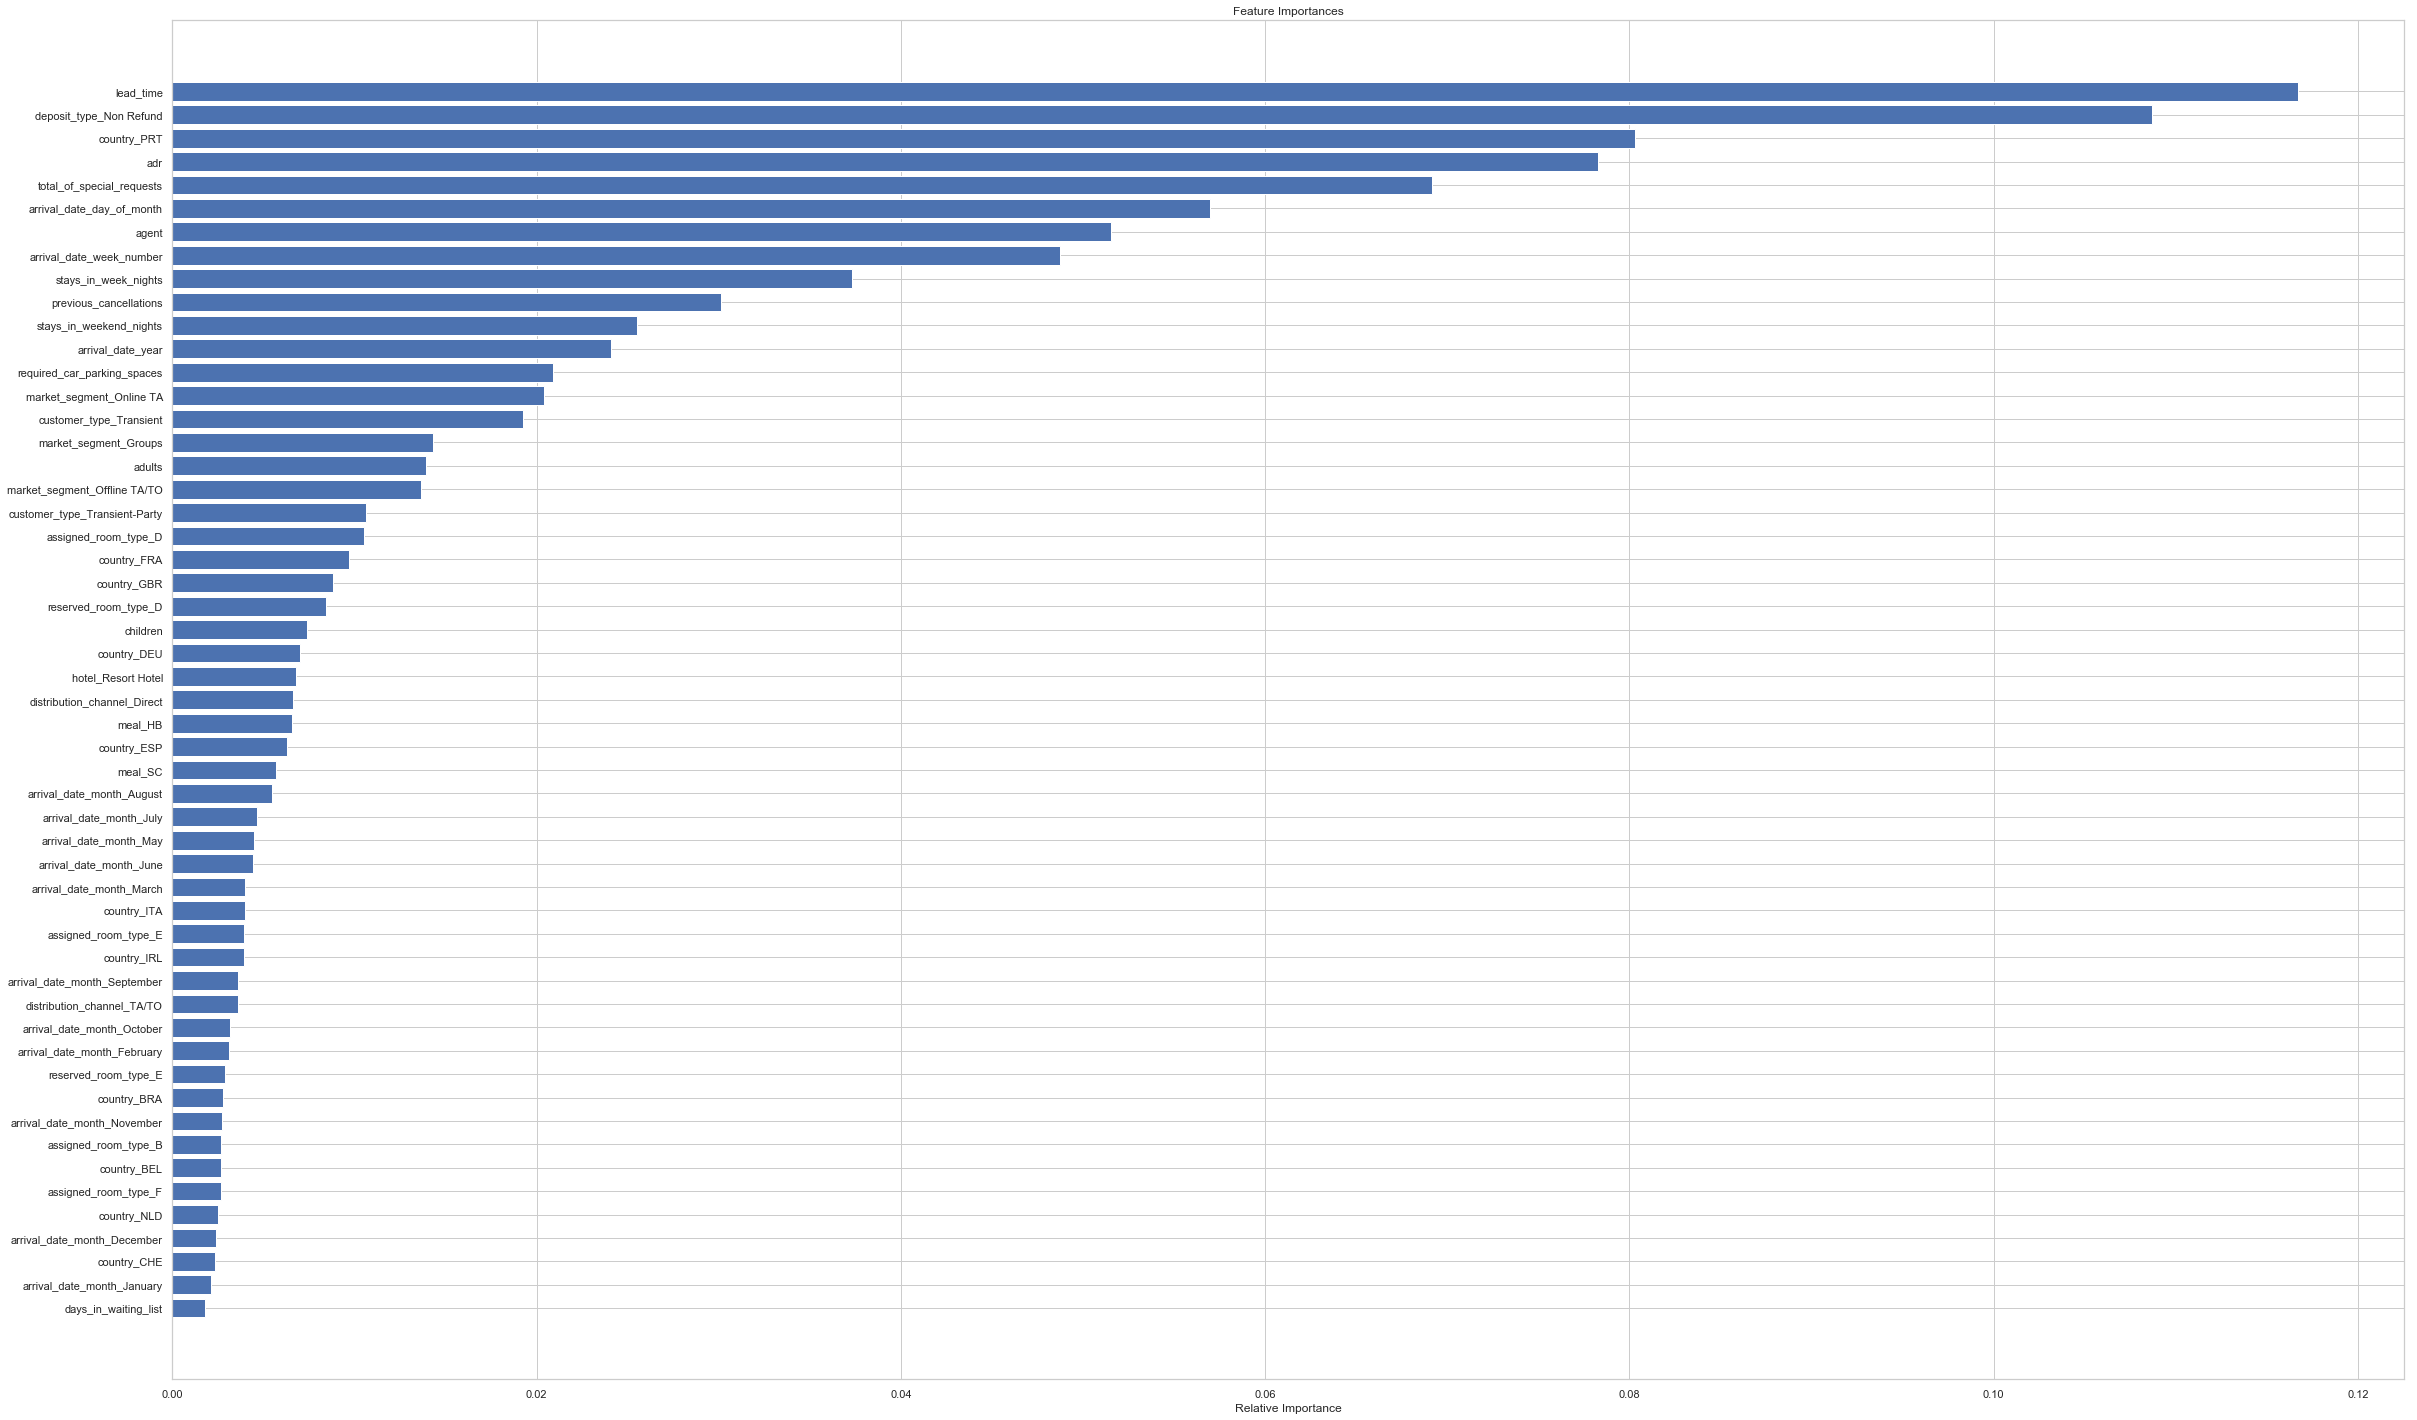

In [59]:
# Determine the most Predictive Features
# clf = RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=100, random_state=42)
clf = RandomForestClassifier(random_state=42)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
features = X_train.columns

# Graph Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)
#print(indices)
plt.figure(figsize=(40, 25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()


In [60]:
# View the feature scores
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

lead_time                        0.116716
deposit_type_Non Refund          0.108665
country_PRT                      0.080293
adr                              0.078294
total_of_special_requests        0.069174
arrival_date_day_of_month        0.056989
agent                            0.051549
arrival_date_week_number         0.048732
stays_in_week_nights             0.037315
previous_cancellations           0.030105
stays_in_weekend_nights          0.025514
arrival_date_year                0.024081
required_car_parking_spaces      0.020868
market_segment_Online TA         0.020407
customer_type_Transient          0.019232
market_segment_Groups            0.014311
adults                           0.013939
market_segment_Offline TA/TO     0.013635
customer_type_Transient-Party    0.010619
assigned_room_type_D             0.010541
country_FRA                      0.009700
country_GBR                      0.008811
reserved_room_type_D             0.008413
children                         0

#### Observations: Identify Most Predictive Features
From our analysis, we concluded that the most useful features for prediction were the following features (Top 15):

- lead_time                        0.116716
- deposit_type_Non Refund          0.108665
- country_PRT                      0.080293
- adr                              0.078294
- total_of_special_requests        0.069174
- arrival_date_day_of_month        0.056989
- agent                            0.051549
- arrival_date_week_number         0.048732
- stays_in_week_nights             0.037315
- previous_cancellations           0.030105
- stays_in_weekend_nights          0.025514
- arrival_date_year                0.024081
- required_car_parking_spaces      0.020868
- market_segment_Online TA         0.020407
- customer_type_Transient          0.019232

In [61]:
end = datetime.datetime.now()
elapsed_time = end - start
print(f'Capstone_ML_Model Total Execution Time: {elapsed_time}')

Capstone_ML_Model Total Execution Time: 10:09:10.464489


# Next Steps

- Now, that we have built and analyzed the baseline and working models, we were able to identified the __Top 15 features__ to build our prediction model against.
- In the jupyter notebook, entitled, __Capstone_ML_Model (Final Prediction)__, we will continue with this analysis to perform the machine learning predictions.

# End Study